In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold

In [180]:
raw = pd.read_csv('clean_data.csv')

In [3]:
df = raw[:]
df.drop(columns=['Unnamed: 0'], inplace=True)
df['label'].replace('clean', int(0), inplace=True)     ### Clean == 0
df['label'].replace('noisy', int(1), inplace=True)     ### Noisy == 1

/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/appy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
y = df['label']
X = df.drop(columns=['label'])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
print(X_tn.shape)
print(X_tt.shape)
print(y_tn.shape)
print(y_tt.shape)

(1318, 26)
(330, 26)
(1318,)
(330,)


In [81]:
# kf = KFold(n_splits=4, random_state=None, shuffle=False)

# Logistic Regression and Random Forest

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [138]:
'''

Fitting Logistic Regression Model

'''

# for i in [0.01, 0.05, 0.25, 0.5, 1]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Accuracy: ".format(i), accuracy_score(y_test, lr_pred))
print("Confusion Matrix: ",(confusion_matrix(y_test, lr_pred)))
print("Report: ",(classification_report(y_test, lr_pred)))

Accuracy:  0.9787878787878788
Confusion Matrix:  [[151   3]
 [  4 172]]
Report:                precision    recall  f1-score   support

           0       0.97      0.98      0.98       154
           1       0.98      0.98      0.98       176

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [139]:
'''

Fitting Random Forest Classifier

'''

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


/Users/appy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.997
Logistic: ROC AUC=0.984


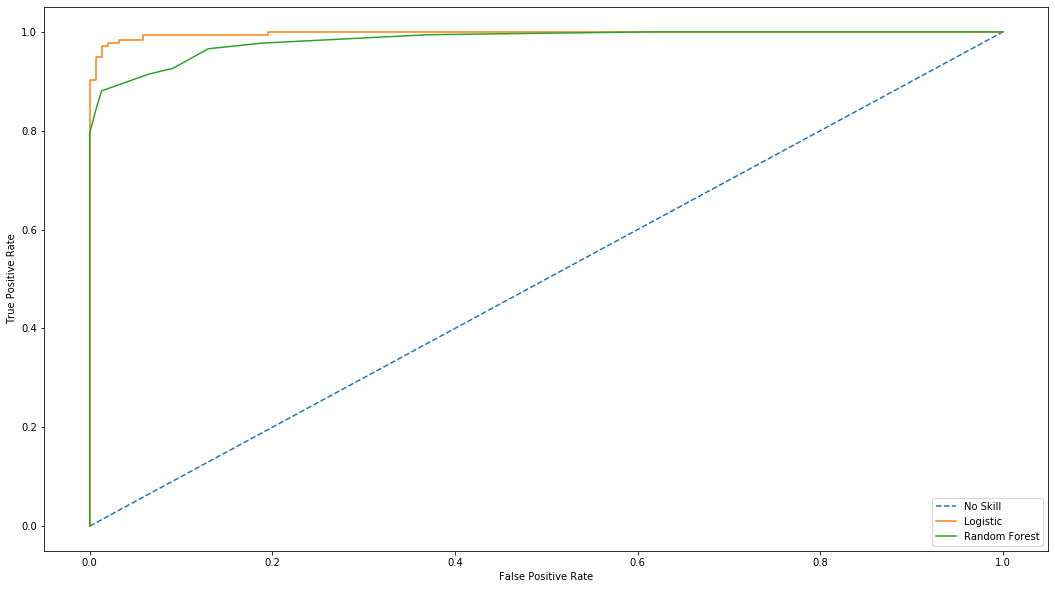

In [184]:
'''

Plot ROC curve after fitting a model

'''

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# Predict Probabilities
lr_probs = lr.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Logistic: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# plot the roc curve for the model
f1,ax1 = plt.subplots(figsize =(18,10))
ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(lr_fpr, lr_tpr, label='Logistic')
ax1.plot(rf_fpr, rf_tpr, label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

Logistic: f1=0.980 auc=0.998
Logistic: f1=0.928 auc=0.987


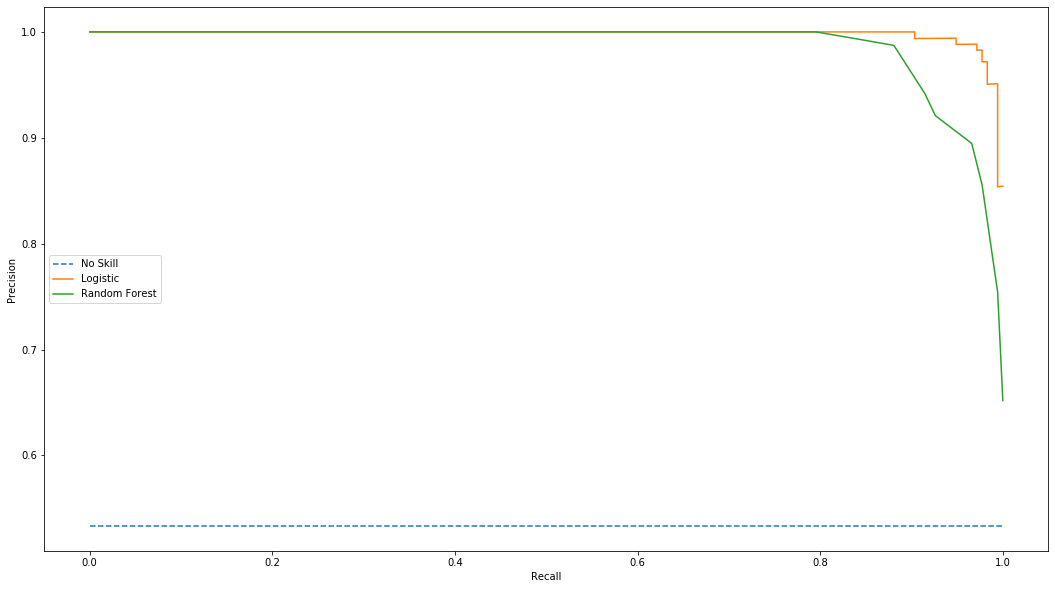

In [185]:
'''

Plot Precision-Recall curve after fitting a model

'''

# predict class values

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, lr_pred), auc(lr_recall, lr_precision)

rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, rf_pred), auc(rf_recall, rf_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Logistic: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)

f2,ax2 = plt.subplots(figsize =(18,10))
ax2.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax2.plot(lr_recall, lr_precision, label='Logistic')
ax2.plot(rf_recall, rf_precision, label='Random Forest')


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

plt.show()

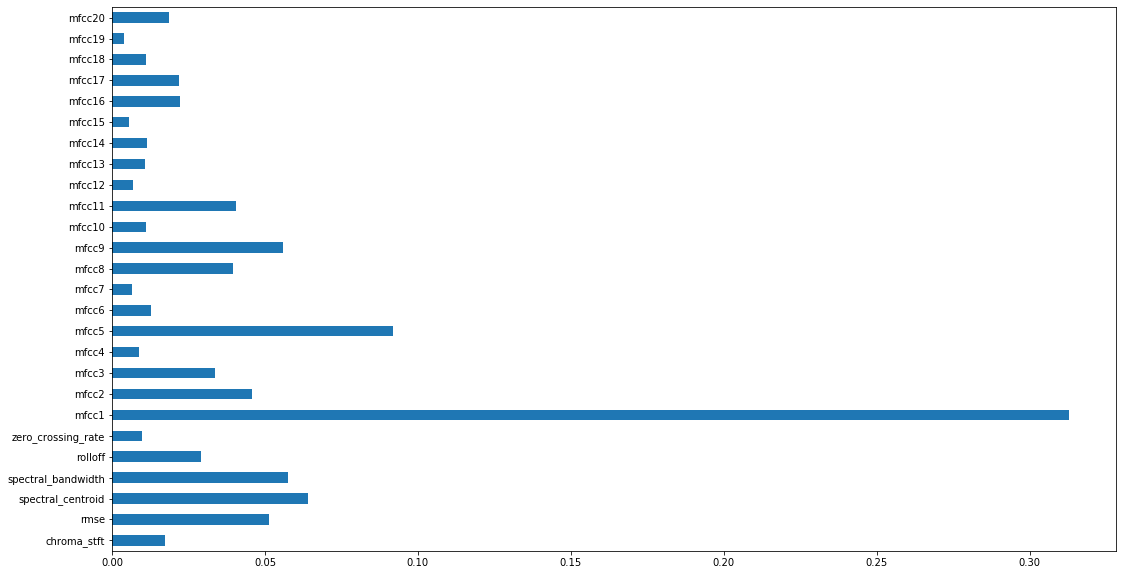

In [187]:
'''

Plot Feature Importance after fitting a random forest

'''

#calculate important features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

#plot graph of feature importances
f3,ax3 = plt.subplots(figsize =(18,10))
feat_importances.plot(kind='barh')
plt.show()
